In [1]:
import numpy as np
import pandas as pd
import cobra
import matplotlib.pyplot as plt
import seaborn as sb
import os
import util.minGenome as minGenome
from util.manipulation import load_latest_model
import pulp

def _import_model(path_to_model):
    import cobra
    extension = path_to_model.split('.')[-1]
    if extension == 'json':
        return cobra.io.load_json_model(path_to_model)
    elif extension == 'xml':
        return cobra.io.read_sbml_model(path_to_model)
    else:
        raise Exception('Model format not compatible, provide xml or json')

In [2]:
pulp.__version__

AttributeError: module 'pulp' has no attribute '__version__'

In [3]:
#Run this to verify which solver(s) are currently available on your machine
pulp.pulpTestAll()

	 Testing zero subtraction
	 Testing inconsistant lp solution
	 Testing continuous LP solution
	 Testing maximize continuous LP solution
	 Testing unbounded continuous LP solution
	 Testing Long Names
	 Testing repeated Names
	 Testing zero constraint
	 Testing zero objective
	 Testing LpVariable (not LpAffineExpression) objective
	 Testing Long lines in LP
	 Testing LpAffineExpression divide
	 Testing MIP solution
	 Testing MIP solution with floats in objective
	 Testing MIP relaxation
	 Testing feasibility problem (no objective)
	 Testing an infeasible problem
	 Testing an integer infeasible problem
	 Testing column based modelling
	 Testing dual variables and slacks reporting
	 Testing fractional constraints
	 Testing elastic constraints (no change)
	 Testing elastic constraints (freebound)
	 Testing elastic constraints (penalty unchanged)
	 Testing elastic constraints (penalty unbounded)
* Solver <class 'pulp.solvers.PULP_CBC_CMD'> passed.
Solver <class 'pulp.solvers.CPLEX_DLL'> un

PulpError: Tests Failed

### 1- Generate the deletions

In [4]:
#Load the appropriate model and set the constraints correctly to ensure that the minimal genome predictions take that into account
model = cobra.io.load_json_model('final_iJL208_28_07_2020.json')

GurobiError: License expired 2020-07-25 - license file '/ip29/jacques_group/Gurobi_solver/licence_server/gurobi.lic'

In [19]:
#Load the different files and paths
# model = load_latest_model()
#Load the sensitivity analysis model that was used last 
data_path = '../data/minGenome'
#Essential genes file
essential_genes_file = os.path.join(data_path,"essentialGene.txt") 
#TUs
parameters_file = os.path.join(data_path,"genes_and_promoters.csv")
#Regulator genes
regulators_file = os.path.join(data_path,"regulatorGenes.txt")
#Promoters
TU_Json_file = os.path.join(data_path,"gene_promoter_dict.json")
#lp output filename
lpfilename = os.path.join(data_path,"mingenome_iJL208_10_15_2019.lp")
out_path = os.path.join(data_path,'Output')
growth_rate = model.slim_optimize()

minGenome.build_MIP_by_Cobrapy(model, 
                               growth_rate, 
                               essential_genes_file,
                               parameters_file,
                               regulators_file,
                               TU_Json_file,
                               out_path,
                               verbose=True,
                               solver='gurobi',
                               iterations=50)

add reaction indicator
add GSM constraint
add cutting constraints
add TU constraint
add no start and essential genes
----------- 1 ------------
Status: Optimal
----------- 2 ------------
Status: Optimal
----------- 3 ------------
Status: Optimal
----------- 4 ------------
Status: Optimal
----------- 5 ------------
Status: Optimal
----------- 6 ------------
Status: Optimal
----------- 7 ------------
Status: Optimal
----------- 8 ------------
Status: Optimal
----------- 9 ------------
Status: Optimal
----------- 10 ------------
Status: Optimal
----------- 11 ------------
Status: Optimal
----------- 12 ------------
Status: Optimal
----------- 13 ------------
Status: Optimal
----------- 14 ------------
Status: Optimal
----------- 15 ------------
Status: Optimal
----------- 16 ------------
Status: Optimal
----------- 17 ------------
Status: Optimal
----------- 18 ------------
Status: Optimal
----------- 19 ------------
Status: Optimal
----------- 20 ------------
Status: Optimal
----------- 

### 2- Analyze the deletions

In [16]:
#Install tqdm 
#The exclamation mark sends this command to the terminal
# ! pip install tqdm --user

Ignoring pip: markers 'python_version < "3"' don't match your environment
Looking in links: /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/nix/sse3, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/nix/generic, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/generic


In [20]:
from tqdm import tqdm
#Load files
genes_and_promoters_file = os.path.join(data_path,"genes_and_promoters.csv")
genes_and_promoters = pd.read_csv(genes_and_promoters_file, index_col=0)
comparison_syn3_file = os.path.join(data_path, 'conservation_essentiality_syn3.csv')
comparison_syn3 = pd.read_csv(comparison_syn3_file, index_col=0) #add this file to the data folder
deletions_file = os.path.join(out_path, 'deletion_results_49.csv')
max_deletion_df = pd.read_csv(deletions_file, index_col=0)

In [25]:
max_deletion_df

,start,end,status
0,u_G_PM_288880-288886,u_G_PM_304214-304220,Optimal
1,u_G_Mfl425,u_G_Mfl432,Optimal
2,u_G_Mfl446,u_G_Mfl454,Optimal
3,u_G_Mflr06,u_G_Mfl405,Optimal
4,u_G_Mflr01,u_G_PM_200226-200232,Optimal
5,u_G_Mfl158,u_G_PM_181505-181511,Optimal
6,u_G_Mfl531,u_G_Mfl537,Optimal
7,u_G_Mfl312,u_G_PM_369529-369535,Optimal
8,u_G_Mfl099,u_G_Mflt01,Optimal
9,u_G_Mfl324,u_G_Mfl328,Optimal


In [22]:
#Get the deletion results
all_deletion_results = minGenome.get_deletion_results(max_deletion_df, genes_and_promoters, comparison_syn3) 
result_df = pd.DataFrame.from_records(all_deletion_results, 
                          columns=['Number of deleted genes',
                                   'Deleted genes',
                                   'Total length of deletions (bp)', 
                                   'MCC'])

100%|██████████| 49/49 [00:05<00:00,  5.42it/s]


In [23]:
#The result dataframe shows:
# - Total number of deleted genes at given deletion
# - The genes deleted by the current deletion
# - Total length of deletions at the current deletion
# - The Matthews Correlation Coefficient (MCC) of the gene deletions as compared to JCVI-syn3.0
result_df

,Number of deleted genes,Deleted genes,Total length of deletions (bp),MCC
0,5,"[Mfl262, Mfl263, Mfl264, Mfl261, Mfl260]",15340,-0.026277
1,11,"[Mfl429, Mfl427, Mfl430, Mfl431, Mfl428, Mfl426]",28541,0.070868
2,18,"[Mfl451, Mfl453, Mfl449, Mfl450, Mfl447, Mfl44...",40161,0.133417
3,23,"[Mfl403, Mflr04, Mfl402, Mfl404, Mflr05]",50942,0.136655
4,27,"[Mfl169, Mflr03, Mflr02, Mfl168]",59329,0.133331
5,28,[Mfl159],67468,0.133331
6,33,"[Mfl532, Mfl535, Mfl533, Mfl534, Mfl536]",76154,0.134958
7,36,"[Mfl314, Mfl313, Mfl315]",84068,0.154004
8,40,"[Mfl102, Mfl103, Mfl100, Mfl101]",91340,0.135894
9,43,"[Mfl326, Mfl327, Mfl325]",98414,0.153822


### 3- Visualize the results

In [26]:
#Load the genbank sequence
from Bio import SeqIO
genbank = SeqIO.read('../Genomes/Mflorum.gbff','genbank')

NameError: name 'index_at_plateau' is not defined

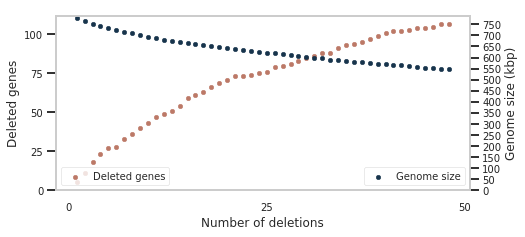

In [27]:
#Add the number of deletions and genome size columns
result_df['Number of deletions'] = np.arange(1,len(result_df)+1)
result_df['Genome size'] = (len(genbank.seq) - result_df['Total length of deletions (bp)'])/1000
#Plot the number of deletions and final genome size
sb.set_style('whitegrid')
sb.set_context("talk",rc={'font.size':30.,
                            'grid.linewidth': .5,
                            'lines.linewidth': 1.,
                            'lines.markersize': 0.5,
                            'patch.linewidth': 0.5})

colors = sb.color_palette('cubehelix',10)
fontsize = 10
major_fontsize= 12
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
#Plot the Number of deleted genes
result_df[:150].plot.scatter(x='Number of deletions',
                             y='Number of deleted genes',
                             color=[colors[5]],
                             ax=ax1)

ax1_xticks = np.arange(0, result_df[:150]['Number of deletions'].max()+10, 25)
ax1_yticks = np.arange(0, round(result_df[:150]['Number of deleted genes'].max()+10,-1), 25)

ax1.set_xticks(ax1_xticks)
ax1.set_xticklabels(ax1_xticks, fontsize=fontsize)
ax1.set_xlabel('Number of deletions', fontsize=major_fontsize)
ax1.set_yticks(ax1_yticks)
ax1.set_yticklabels(ax1_yticks,fontsize=fontsize)
ax1.set_ylabel('Deleted genes', fontsize=major_fontsize)
ax1.legend(['Deleted genes'],fontsize=fontsize,loc=3)
ax1.xaxis.grid(False)
ax1.yaxis.grid(False)

result_df[:150].plot.scatter(x='Number of deletions',
                             y='Genome size',
                             color=[colors[1]],
                             ax=ax2)

ax2_yticks = np.arange(0, round(result_df[:150]['Genome size'].max()+10,-2), 50).astype(int)
ax2.set_yticks(ax2_yticks)
ax2.set_yticklabels(ax2_yticks,fontsize=fontsize)
ax2.set_ylabel('Genome size (kbp)',fontsize=major_fontsize)
ax2.legend(['Genome size'],fontsize=fontsize,loc=4)
ax2.yaxis.grid(False)
plt.tight_layout()
ax2.plot([index_at_plateau,index_at_plateau],[490,result_df['Genome size'].max()],'--',linewidth=1.5,c='grey')
ax2.plot([0,result_df[:150]['Number of deletions'].max()],[531,531],'--',linewidth=1.5,c=colors[5])
plt.tight_layout()
# t = f"{max(result_df['Number of deleted genes'])} genes removed"
# plt.text(45,80,s=t,fontsize=20)